In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm
import warnings
import itertools
from collections import Counter

C:\Users\sngupta\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
plt.rcParams['figure.figsize']= (16, 12)
plt.style.use('fivethirtyeight')
sns.set(style= 'whitegrid', color_codes= True)

In [5]:
path= 'C://Users//sngupta//Documents//minor_project//equity_data//'

In [6]:
#Here, I'm going to read ICICI BANK
df= pd.read_csv(path+'ACC.csv', parse_dates= ['Date'])

In [7]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Stock
0,2011-01-03,1078.0,1084.4,1065.00,1075.00,1074.40,242570.0,2606.08,ACC
1,2011-01-04,1074.7,1088.0,1065.00,1071.10,1073.35,286869.0,3085.65,ACC
2,2011-01-05,1074.4,1079.9,1057.35,1059.05,1064.40,152987.0,1636.92,ACC
3,2011-01-06,1067.0,1069.5,1015.00,1020.00,1022.55,482636.0,4997.77,ACC
4,2011-01-07,1024.0,1026.9,990.05,1000.00,1002.30,338764.0,3424.68,ACC


In [8]:
df= df[['Date', 'Last']]
df.rename(columns= {'Last': 'Adj_Close'}, inplace= True)

In [9]:
df['Date']= pd.to_datetime(df['Date'])
df= df.set_index('Date')

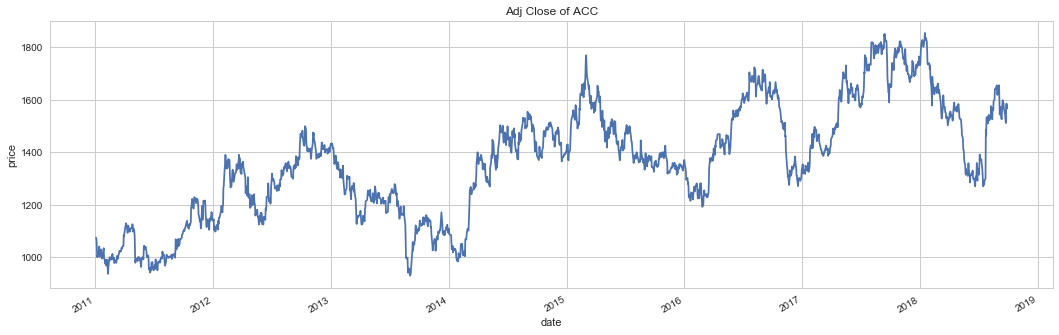

In [10]:
#Here, check the plot
plt.subplot(211)
df['Adj_Close'].plot(label= 'Adj Close')
plt.xlabel('date')
plt.ylabel('price')
plt.title('Adj Close of ACC')
plt.show()

In [11]:
df.shape

(1920, 1)

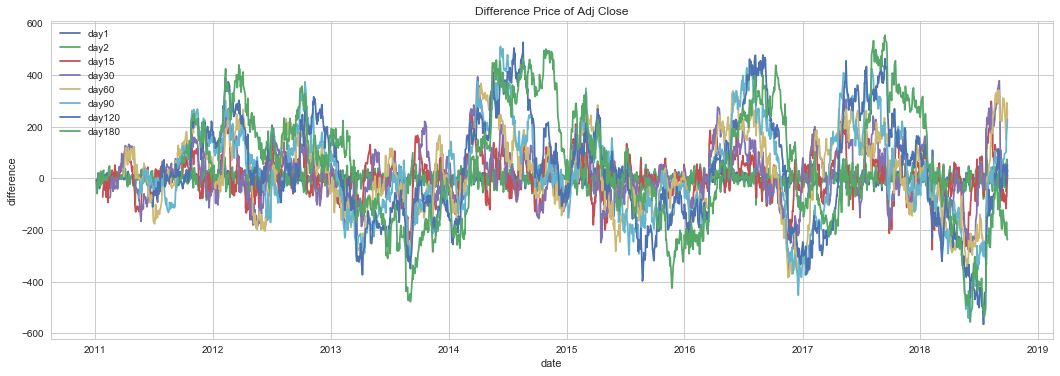

In [15]:
plt.subplot(211)
plt.plot(df.index, df['Adj_Close']-df['Adj_Close'].shift(), label= 'day1')
plt.plot(df.index, df['Adj_Close']-df['Adj_Close'].shift(2), label= 'day2')
plt.plot(df.index, df['Adj_Close']-df['Adj_Close'].shift(15), label= 'day15')
plt.plot(df.index, df['Adj_Close']-df['Adj_Close'].shift(30), label= 'day30')
plt.plot(df.index, df['Adj_Close']-df['Adj_Close'].shift(60), label= 'day60')
plt.plot(df.index, df['Adj_Close']-df['Adj_Close'].shift(90), label= 'day90')
plt.plot(df.index, df['Adj_Close']-df['Adj_Close'].shift(120), label= 'day120')
plt.plot(df.index, df['Adj_Close']-df['Adj_Close'].shift(180), label= 'day180')
plt.xlabel('date')
plt.ylabel('difference')
plt.title('Difference Price of Adj Close')
plt.legend(loc= 'best')
plt.show()

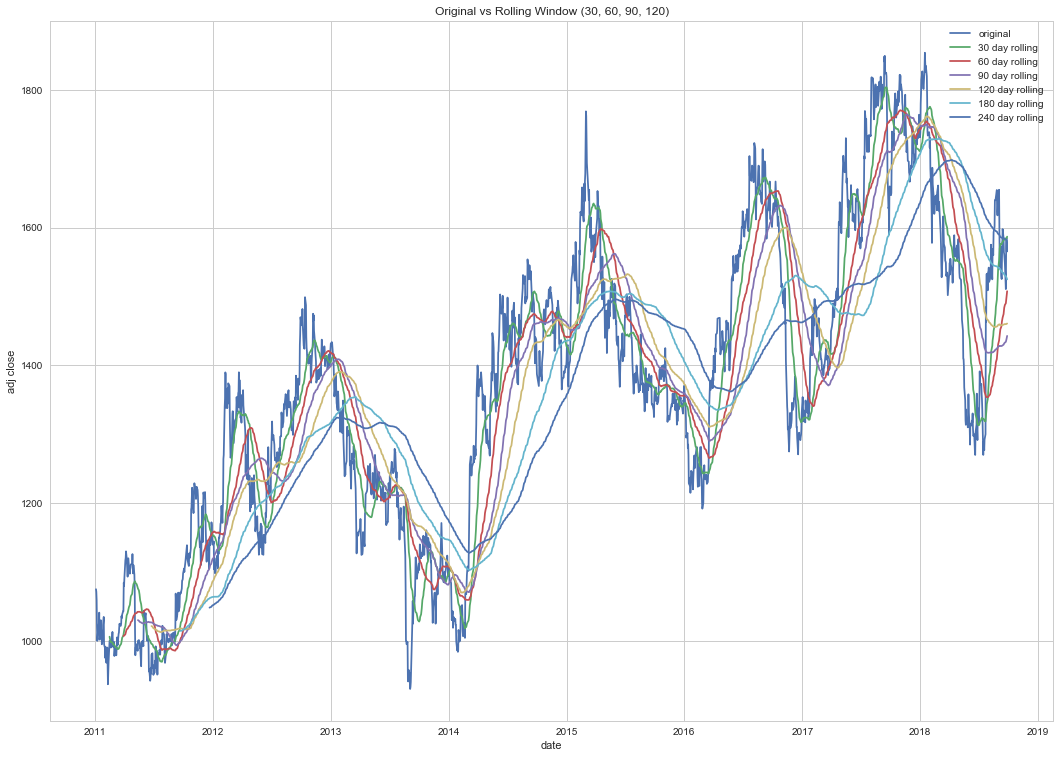

In [19]:
#rolling window
plt.plot(df.index, df['Adj_Close'], label= 'original')
plt.plot(df.index, pd.rolling_mean(df['Adj_Close'], window= 30), label= '30 day rolling')
plt.plot(df.index, pd.rolling_mean(df['Adj_Close'], window= 60), label= '60 day rolling')
plt.plot(df.index, pd.rolling_mean(df['Adj_Close'], window= 90), label= '90 day rolling')
plt.plot(df.index, pd.rolling_mean(df['Adj_Close'], window= 120), label= '120 day rolling')
plt.plot(df.index, pd.rolling_mean(df['Adj_Close'], window= 180), label= '180 day rolling')
plt.plot(df.index, pd.rolling_mean(df['Adj_Close'], window= 240), label= '240 day rolling')
plt.xlabel('date')
plt.ylabel('adj close')
plt.title('Original vs Rolling Window (30, 60, 90, 120)')
plt.legend(loc= 'best')
plt.show()

In [20]:
#Check out the seasonality components
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
decompose7= seasonal_decompose(df, freq= 7)
decompose30= seasonal_decompose(df, freq= 30)
decompose60= seasonal_decompose(df, freq= 60)
decompose120= seasonal_decompose(df, freq= 120)
decompose240= seasonal_decompose(df, freq= 240)

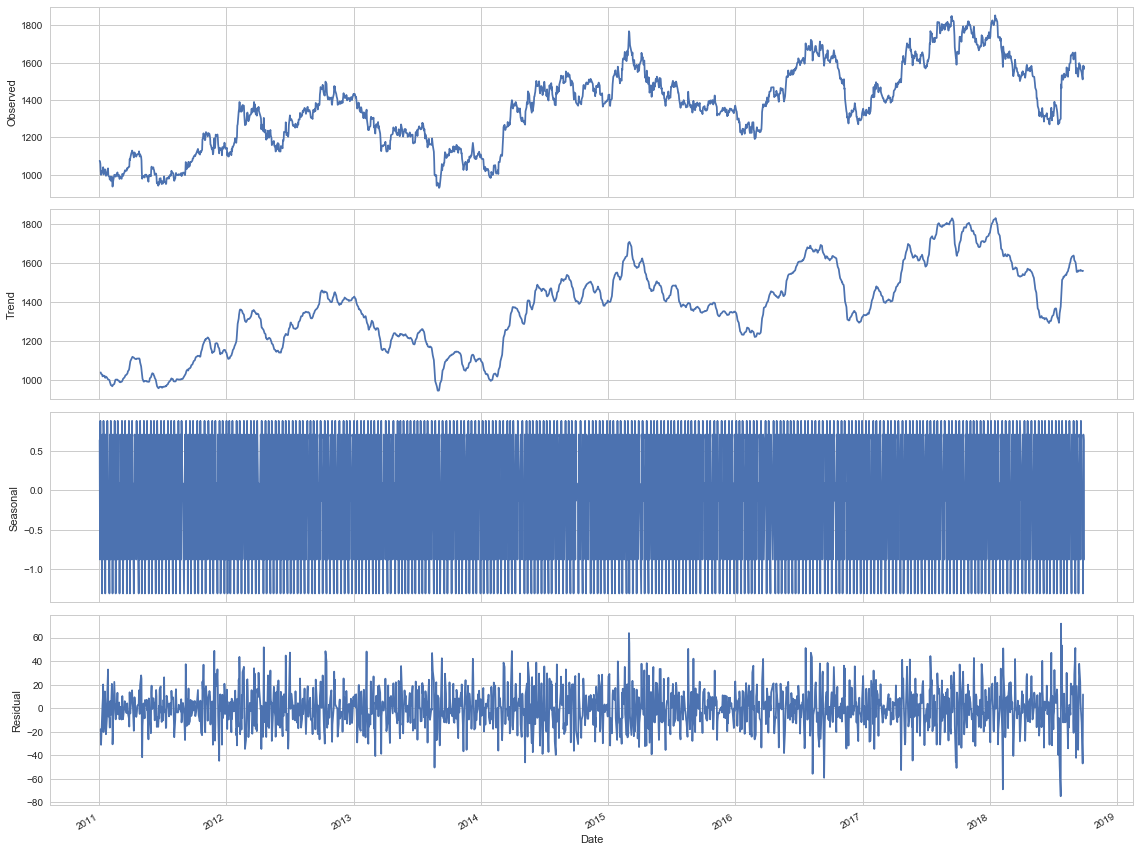

In [36]:
decompose7.plot()
plt.show()

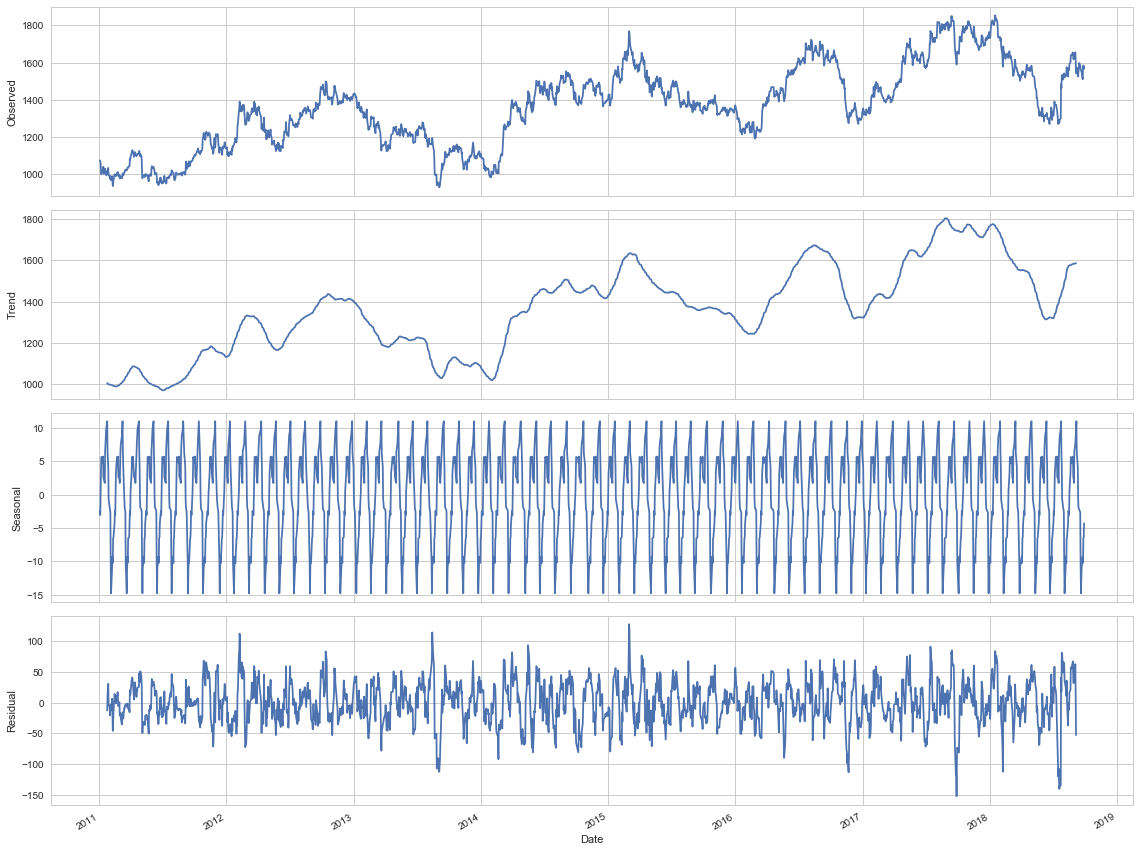

In [37]:
decompose30.plot()
plt.show()

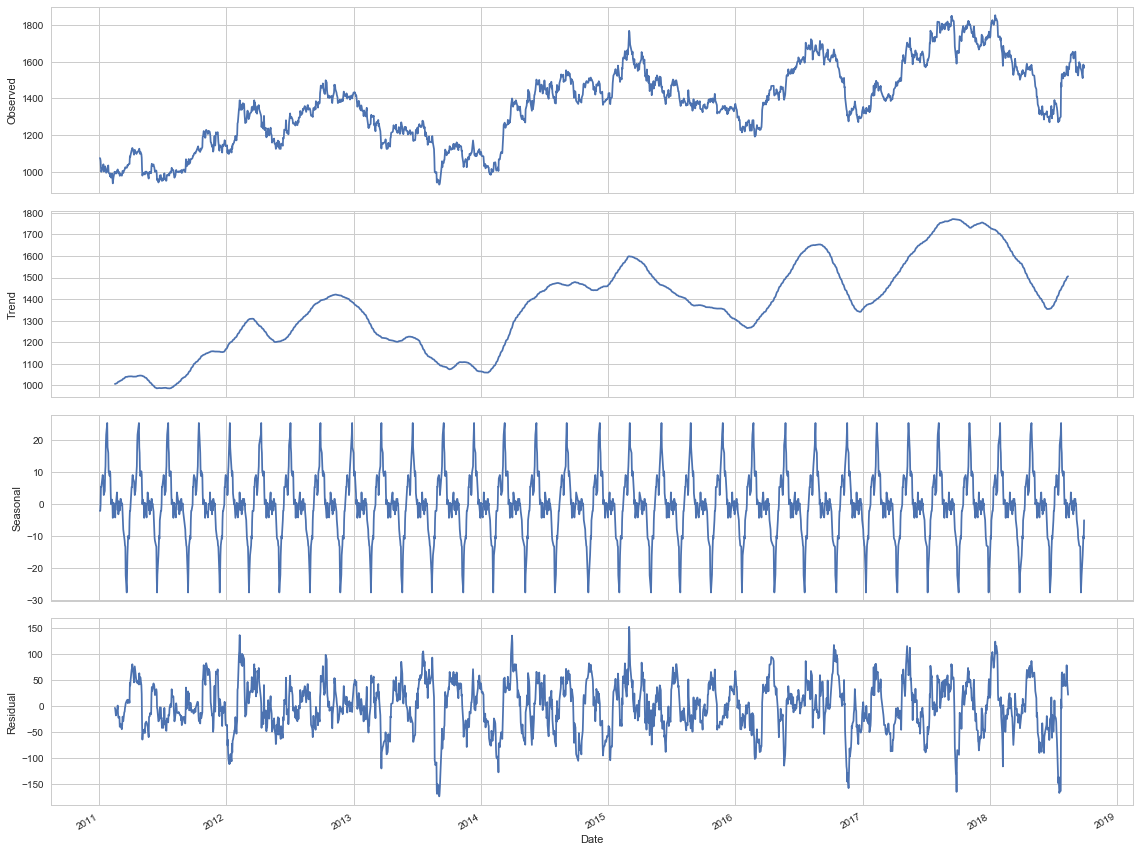

In [38]:
decompose60.plot()
plt.show()

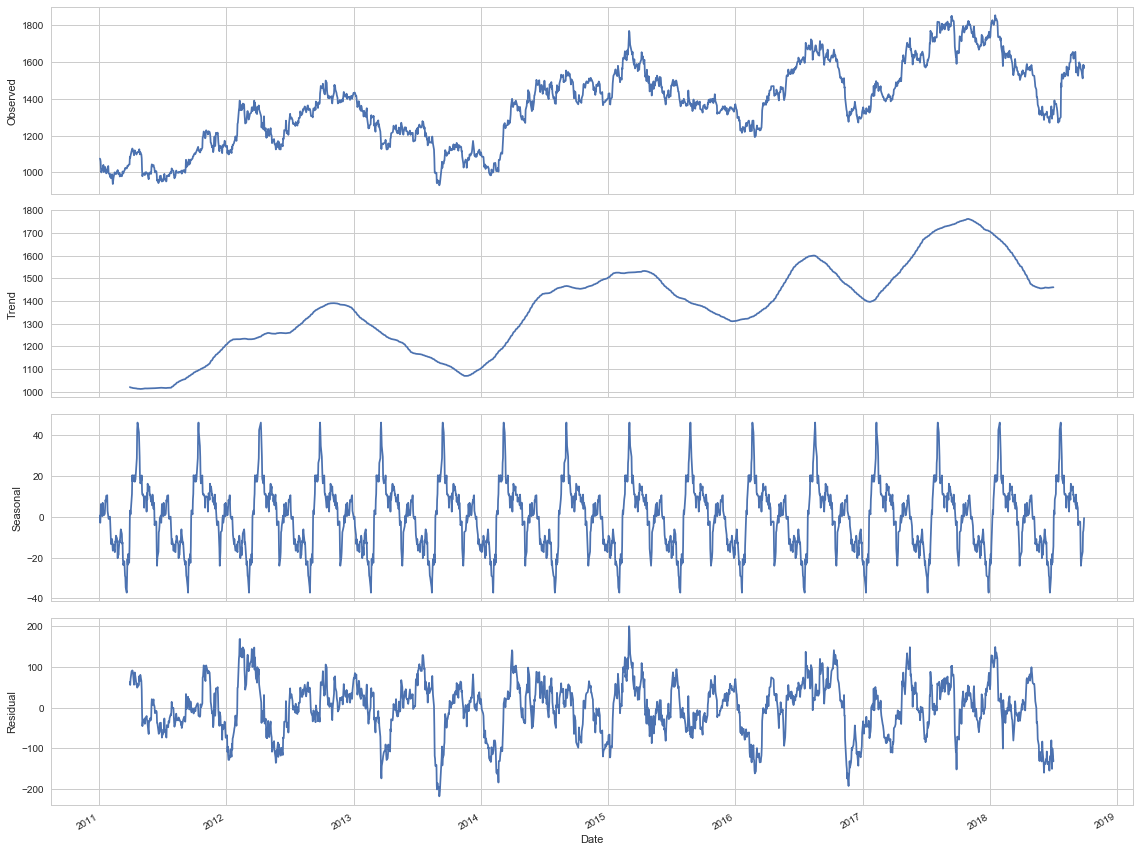

In [39]:
decompose120.plot()
plt.show()

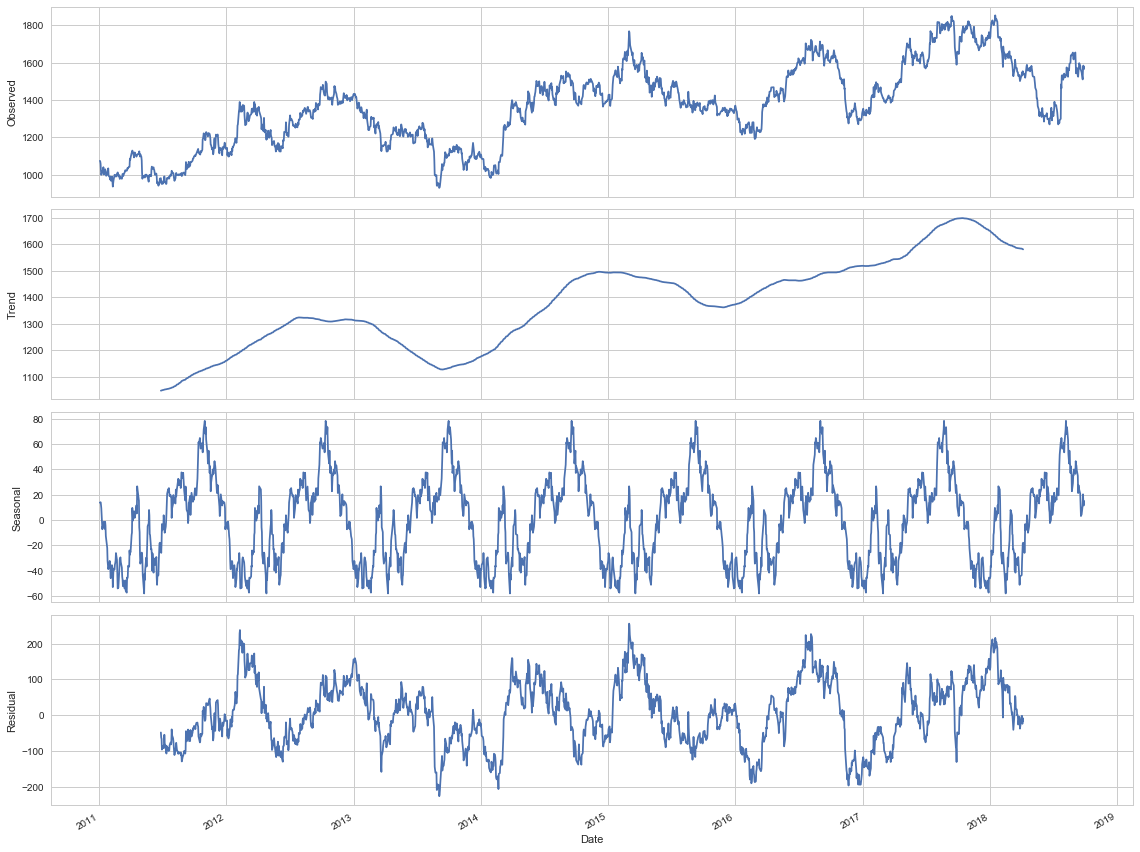

In [40]:
decompose240.plot()
plt.show()

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, seasonal_plot

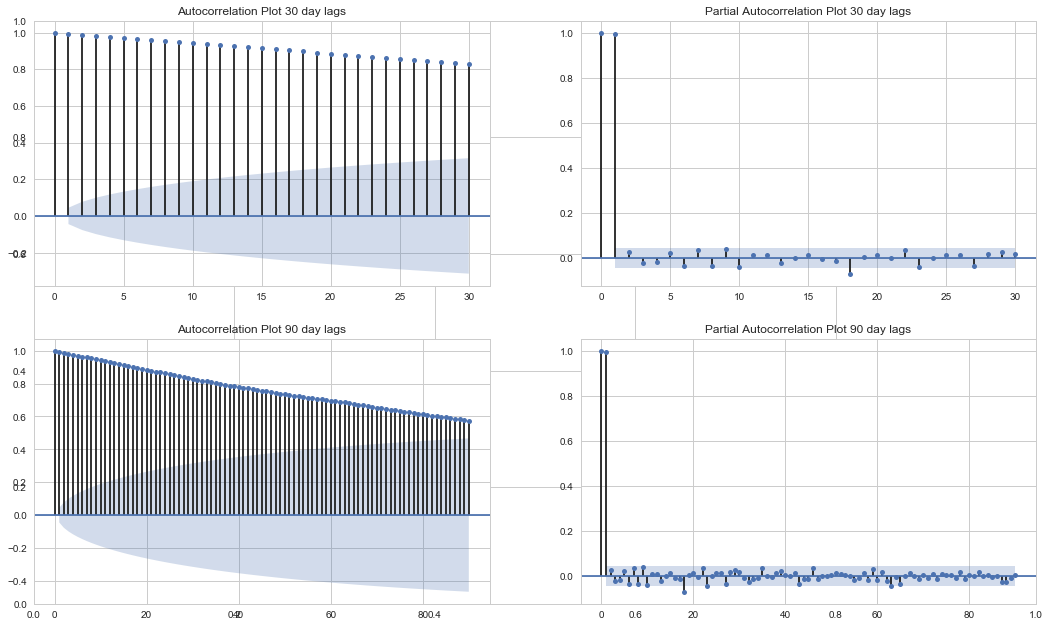

In [53]:
fig, ax= plt.subplots(figsize= (16, 10))
ax= fig.add_subplot(221)
plot_acf(df, lags= 30, ax= ax)
plt.title('Autocorrelation Plot 30 day lags')

ax= fig.add_subplot(222)
plot_pacf(df, lags= 30, ax= ax)
plt.title('Partial Autocorrelation Plot 30 day lags')

ax= fig.add_subplot(223)
plot_acf(df, lags= 90, ax= ax)
plt.title('Autocorrelation Plot 90 day lags')

ax= fig.add_subplot(224)
plot_pacf(df, lags= 90, ax= ax)
plt.title('Partial Autocorrelation Plot 90 day lags')

plt.show()

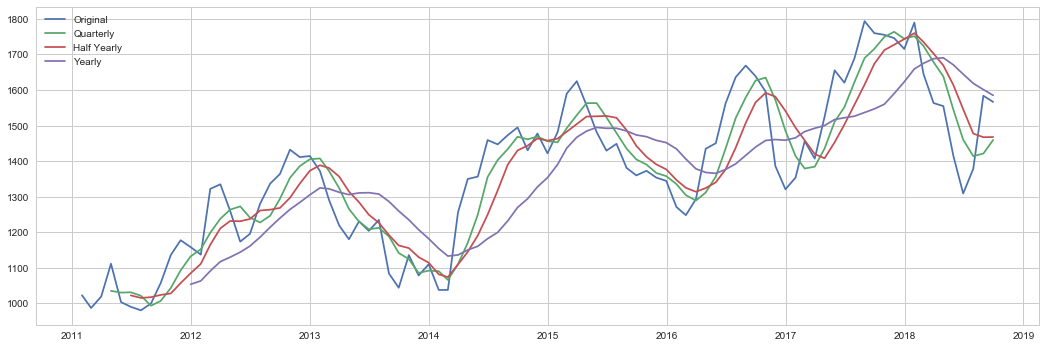

In [57]:
#first resample the data on monthly basis
df_12= df.resample('M').mean()

plt.subplot(211)
plt.plot(df_12.index, df_12['Adj_Close'], label= 'Original')
plt.plot(df_12.index, pd.rolling_mean(df_12['Adj_Close'], window= 4), label= 'Quarterly')
plt.plot(df_12.index, pd.rolling_mean(df_12['Adj_Close'], window= 6), label= 'Half Yearly')
plt.plot(df_12.index, pd.rolling_mean(df_12['Adj_Close'], window= 12), label= 'Yearly')
plt.legend(loc= 'best')
plt.show()

In [58]:
#from the above decomposition graph you conclude that the data is not stationary in nature thus we have to
#check the stationary test and try to reduce eliminate it use adfuller, kpss test
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf
#it is used to check the stationary conditions how it holds
#After I'm doing differencing and log transformation to eliminate the stationary

In [59]:
#Adfuller test
def adfuller_test(df, threshold= 0.01):
    test= adfuller(df, autolag= 'BIC')
    p_value= test[0]
    print('ADF p_value: {:.5f}' .format(p_value))
    return p_value<threshold

def kpss_test(df, threshold= 0.05):
    test= kpss(df)
    p_value= test[0]
    print('KPSS p_value: {:.5f}' .format(p_value))
    return p_value<threshold

In [62]:
threshold= 0.05
print('For threshold level: {}%' .format(threshold*100))

print('Stationary by ADF: {}' .format('YES' if adfuller_test(df['Adj_Close'].dropna(), threshold) else 'NO'))

print('Stationary by KPSS: {}' .format('YES' if kpss_test(df['Adj_Close'].dropna(), threshold) else 'NO'))

For threshold level: 5.0%
ADF p_value: -2.34326
Stationary by ADF: YES
KPSS p_value: 4.34567
Stationary by KPSS: NO


In [73]:
df['Stationary']= df['Adj_Close']-df['Adj_Close'].shift(1)

In [75]:
threshold= 0.05
print('For threshold level: {}%' .format(threshold*100))

print('Stationary by ADF: {}' .format('YES' if adfuller_test(df['Stationary'].dropna(), threshold) else 'NO'))

print('Stationary by KPSS: {}' .format('YES' if kpss_test(df['Stationary'].dropna(), threshold) else 'NO'))

For threshold level: 5.0%
ADF p_value: -45.31037
Stationary by ADF: YES
KPSS p_value: 0.02545
Stationary by KPSS: YES


In [77]:
#checkout the stationary using log trasnformation
df['Log_Adj']= np.log(df['Adj_Close']+1)

In [78]:
threshold= 0.05
print('For threshold level: {}%' .format(threshold*100))

print('Stationary by ADF: {}' .format('YES' if adfuller_test(df['Log_Adj'].dropna(), threshold) else 'NO'))

print('Stationary by KPSS: {}' .format('YES' if kpss_test(df['Log_Adj'].dropna(), threshold) else 'NO'))

For threshold level: 5.0%
ADF p_value: -2.32472
Stationary by ADF: YES
KPSS p_value: 4.32829
Stationary by KPSS: NO


In [79]:
#Check out the log differencing
df['Log_diff']= df['Log_Adj']-df['Log_Adj'].shift(1)

In [80]:
threshold= 0.05
print('For threshold level: {}%' .format(threshold*100))

print('Stationary by ADF: {}' .format('YES' if adfuller_test(df['Log_diff'].dropna(), threshold) else 'NO'))

print('Stationary by KPSS: {}' .format('YES' if kpss_test(df['Log_diff'].dropna(), threshold) else 'NO'))

For threshold level: 5.0%
ADF p_value: -44.94305
Stationary by ADF: YES
KPSS p_value: 0.02592
Stationary by KPSS: YES


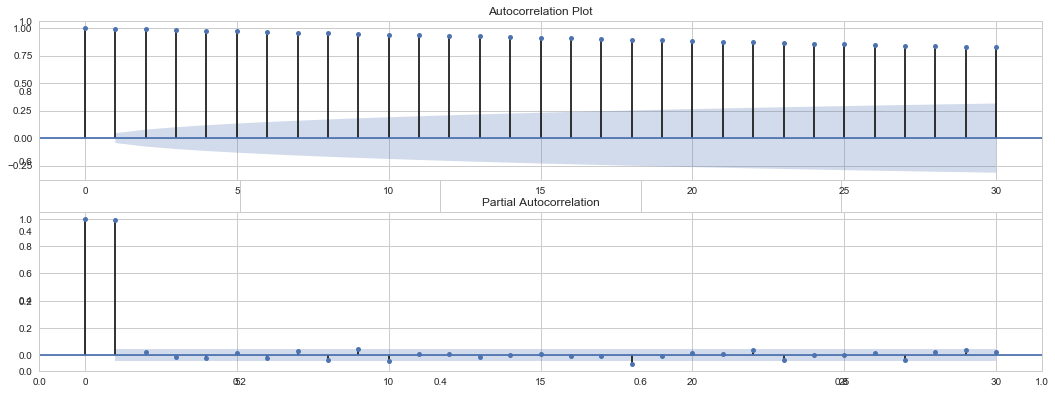

In [84]:
#After one step of differencing the data come to in the stationaryt state
#Thus the value of d= 1 (i.e. step of differencing)
#First I, have to find out the value of p and q by plotting the acf and pacf
#Using log transformed value
fig, ax= plt.subplots(figsize= (16, 6))
ax= fig.add_subplot(211)
plot_acf(df['Log_Adj'], lags= 30, ax= ax)
plt.title('Autocorrelation Plot')

ax= fig.add_subplot(212)
plot_pacf(df['Log_Adj'], lags= 30, ax= ax)
plt.title('Partial Autocorrelation')

plt.show()

In [85]:
#According to the autocorrelation and partial autocorrelation plot the value of 
#q= 0 and p= 3
#Let check out using these
#split the data in 60:20:20
train_df= df[: int(len(df)*0.6)]
val_df= df[int(len(df)*.6):int(len(df)*0.8)]
test_df= df[int(len(df)*0.8):]

In [87]:
val_df.shape, test_df.shape

((384, 4), (384, 4))

In [88]:
#I'm going to take the log transformed values as input of the model
from statsmodels.tsa.arima_model import ARIMA

In [112]:
def arima_model(df, step= val_df.shape[0], val_df= val_df):
    model= ARIMA(df['Log_Adj'], order= (2,1,2))
    
    result= model.fit()
    print(result.summary())
    
    forecast= result.forecast(steps= step)
    forecast= forecast[0]
    
    val_df['Predicted']= forecast
    
    plt.subplot(211)
    plt.plot(val_df.index, np.exp(val_df['Log_Adj']), label= 'Original')
    plt.plot(val_df.index, np.exp(val_df['Predicted']), label= 'predicted')
    plt.title('Forecasting using ARIMA model')
    plt.xlabel('date')
    plt.ylabel('price')
    plt.show()

                             ARIMA Model Results                              
Dep. Variable:              D.Log_Adj   No. Observations:                 1151
Model:                 ARIMA(2, 1, 2)   Log Likelihood                3059.398
Method:                       css-mle   S.D. of innovations              0.017
Date:                Fri, 26 Oct 2018   AIC                          -6106.797
Time:                        10:34:53   BIC                          -6076.506
Sample:                    01-04-2011   HQIC                         -6095.363
                         - 08-20-2015                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0003      0.000      0.912      0.362      -0.000       0.001
ar.L1.D.Log_Adj     0.0248      0.133      0.186      0.852      -0.236       0.285
ar.L2.D.Log_Adj     0.9300      

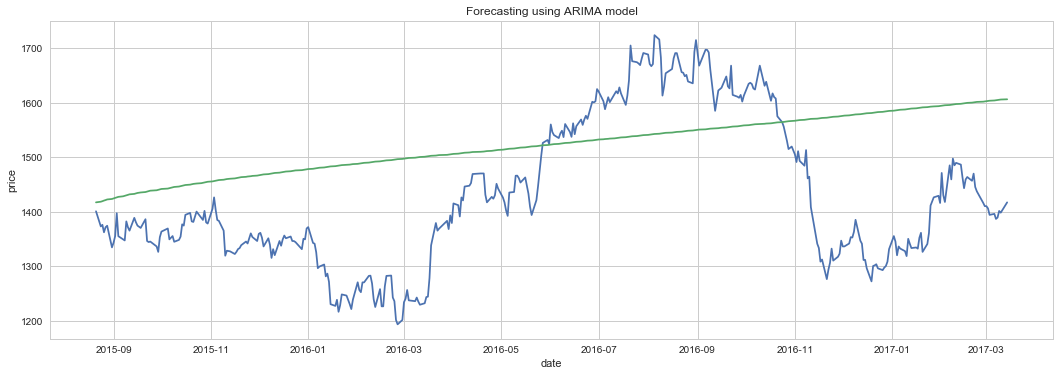

In [113]:
arima_model(train_df)